In [12]:
import pandas as pd
import numpy as np
import os
from filtering_significance import filter_significance

In [27]:
#load BIRDMAn outputs for each variable
birdman_path = '/home/lakhatib/Wisconsin_MARS/metagenomics/birdman'
outcomes = ['diagnosis', 'amyloid', 'apoe4']

set_labels = ('Dementia', 'Amyloid', '$\mathit{APOE}$ $\mathit{ε4}$')

output_path = "/home/lakhatib/BIRDMAn_output_scripts/figures"

# Load the data
df = {} 

for outcome in outcomes:
    #remove .nc files from inferences directory to clean/make space on server 
    if os.path.exists(f"{birdman_path}/{outcome}/inferences/birdman_feature-table"):
        !rm -r {birdman_path}/{outcome}/inferences/birdman_feature-table
    else:
        print(f"No {outcome} inferences directory found...")
        
    #load summarized inferences table
    df[outcome] = pd.read_csv(f"{birdman_path}/{outcome}/species/inferences-results/{outcome}_birdman_l7_ft.beta_var.tsv", sep="\t")

No diagnosis inferences directory found...
No amyloid inferences directory found...
No apoe4 inferences directory found...


In [28]:
top_negative = {}
top_positive = {}

for outcome in outcomes:
    if outcome == 'diagnosis':
        reverse_values = True
    else:
        reverse_values = False 
    
    df[outcome], top_positive[outcome], top_negative[outcome] = filter_significance(df[outcome], reverse_values=reverse_values, top_40=False)

Test column: diagnosis[T.Normal]
Total features before filtering: 651
Significant features: 252
Top Features: 95
Bottom Features: 157
Test column: amyloid[T.Positive]
Total features before filtering: 651
Significant features: 174
Top Features: 83
Bottom Features: 91
Test column: apoe4[T.Positive]
Total features before filtering: 651
Significant features: 254
Top Features: 80
Bottom Features: 174


In [29]:
top_negative['diagnosis']['Feature']

0            s__Lachnospira sp000436535
7      s__Cryptobacteroides sp000431015
9      s__Cryptobacteroides sp000433355
16       s__Acutalibacter ornithocaccae
22            s__Blautia_A avistercoris
                     ...               
621         s__Hungatella_A hathewayi_A
626             s__UBA11524 sp000437595
630              s__UBA1829 sp900549045
633                s__Dialister hominis
649      s__Marseille-P2935 sp900104565
Name: Feature, Length: 157, dtype: object

In [30]:
features = {}

for outcome in outcomes:
    features[outcome] = {}
    features[outcome]['top'] = top_positive[outcome]['Feature']
    features[outcome]['bottom'] = top_negative[outcome]['Feature']

In [31]:
outcomes[0]

'diagnosis'

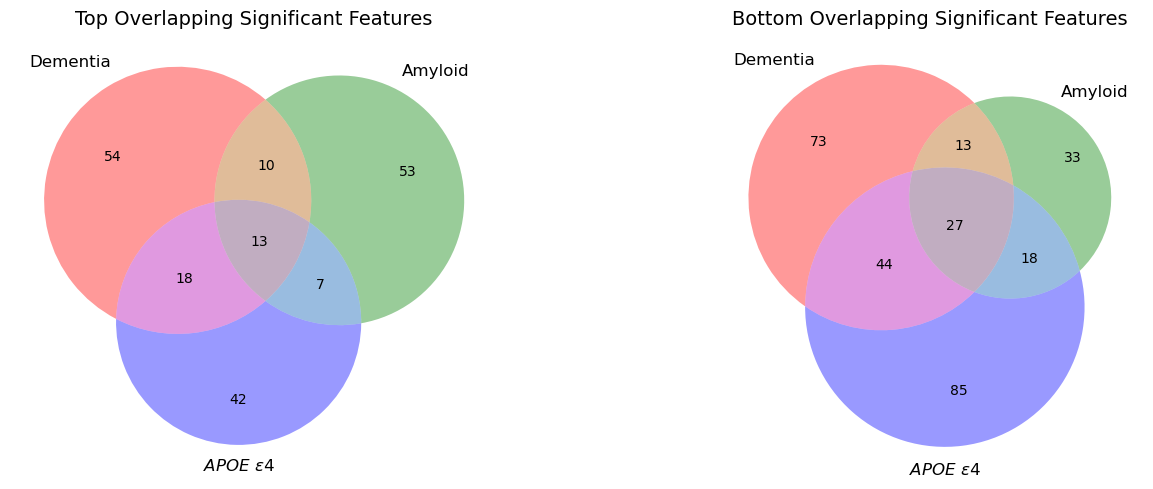

In [47]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define the number of rows (one for each taxonomic level) and two columns (one for top, one for bottom)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figsize as needed

for j, feature_type in enumerate(['top', 'bottom']):
    # Access the subplot for the current level and feature type
    ax = axs[j]

    # Prepare the sets for Venn diagram
    set_1 = set(features[outcomes[0]][feature_type])
    set_2 = set(features[outcomes[1]][feature_type])
    set_3 = set(features[outcomes[2]][feature_type])

    # Create the Venn diagram on the selected subplot
    venn_diagram = venn3([set_1, set_2, set_3],
                         set_labels=set_labels,
                         ax=ax)

    # Adjust the fontsize of outer set labels
    for label in venn_diagram.set_labels:
        label.set_fontsize(12)

        venn_labels = {
            #'100': set_dementia - set_amyloid - set_apoe4,
            #'010': set_amyloid - set_dementia - set_apoe4,
            #'001': set_apoe4 - set_dementia - set_amyloid,
            #'110': set_dementia & set_amyloid - set_apoe4,
            #'101': set_dementia & set_apoe4 - set_amyloid,
            #'011': set_amyloid & set_apoe4 - set_dementia,
            #'111': set_dementia & set_amyloid & set_apoe4
        }

        # Set initial position offsets
    offsets = {
        '100': (-0.04, 0),
        '010': (0, 0),
        '001': (0, -.015),
        '110': (0, -0.02),
        '101': (-0.02, .02),
        '011': (0, 0),
        '111': (0.02, 0)
    }

    for label_id, microbes in venn_labels.items():
        label = venn_diagram.get_label_by_id(label_id)
        if label:
            offset_x, offset_y = offsets[label_id]
            label.set_text('\n'.join(microbes))
            label.set_fontsize(8)
            label.set_x(label.get_position()[0] + offset_x)
            label.set_y(label.get_position()[1] + offset_y)
            

    ax.set_title(f"{feature_type.capitalize()} Overlapping Significant Features", fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the entire figure
plt.savefig(f'{output_path}/venn_diagram_outcomes.png', dpi=300)
plt.show()
